In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [2]:
df=pd.read_csv('data/classification/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Data cleaning

In [4]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['Gender'].replace('Fe Male','Female')
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['MaritalStatus'].replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [9]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [10]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [11]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [12]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [13]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [14]:
numeric_cols = df.select_dtypes(include=[np.number])
null_counts = numeric_cols.isnull().sum()
cols_to_fill = null_counts[null_counts > 0].index.tolist()
cols_to_fill

median_values = {col: df[col].median() for col in cols_to_fill}

# Fill the NaN values in the specified columns using the median dictionary
df.fillna(value=median_values, inplace=True)

# Confirm null values have been filled
df[cols_to_fill].isnull().sum()

Age                         0
DurationOfPitch             0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
NumberOfChildrenVisiting    0
MonthlyIncome               0
dtype: int64

In [15]:
# since there is only one categorical column that has missing values we will directly fill with mode
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
# Since customer ID is non related we will drop this
df.drop('CustomerID',axis=1,inplace=True)

### Feature Engineering

In [18]:
df['Total Visiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [19]:
num_features = df.select_dtypes(include=[np.number]).columns
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 12


In [20]:
cat_features = df.select_dtypes(include=[np.object_]).columns
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


In [21]:
## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 9


In [22]:
## continuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


## Encoding and Standardization

In [23]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [25]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", ohe_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [26]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [27]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

## Gradient Boost Classifier Training

In [28]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [29]:
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}

In [30]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # Make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Training performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    model_train_confusion_matrix=confusion_matrix(y_train,y_train_pred)

    # Testing performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    model_test_confusion_matrix=confusion_matrix(y_test,y_test_pred)

    print('\n=============================================')
    print(list(models.keys())[i])
    print('=============================================\n')

    print('Model Performance for Training Data\n')
    print('- Accuracy:{:.4f}'.format(model_train_accuracy))
    print('- F1 Score:{:.4f}'.format(model_train_f1))
    print('- Precision:{:.4f}'.format(model_train_precision))
    print('- Recall:{:.4f}'.format(model_train_recall))
    print('- ROC AUC Score:{:.4f}'.format(model_train_rocauc_score))
    print('- Confusion Matrix:\n',model_train_confusion_matrix)

    print('\nModel Performance for Test Data\n')
    print('- Accuracy:{:.4f}'.format(model_test_accuracy))
    print('- F1 Score:{:.4f}'.format(model_test_f1))
    print('- Precision:{:.4f}'.format(model_test_precision))
    print('- Recall:{:.4f}'.format(model_test_recall))
    print('- ROC AUC Score:{:.4f}'.format(model_test_rocauc_score))
    print('- Confusion Matrix:\n',model_test_confusion_matrix)


Decision Tree

Model Performance for Training Data

- Accuracy:1.0000
- F1 Score:1.0000
- Precision:1.0000
- Recall:1.0000
- ROC AUC Score:1.0000
- Confusion Matrix:
 [[2747    0]
 [   0  674]]

Model Performance for Test Data

- Accuracy:0.8814
- F1 Score:0.6654
- Precision:0.6314
- Recall:0.7033
- ROC AUC Score:0.8103
- Confusion Matrix:
 [[1120  101]
 [  73  173]]

Random Forest

Model Performance for Training Data

- Accuracy:1.0000
- F1 Score:1.0000
- Precision:1.0000
- Recall:1.0000
- ROC AUC Score:1.0000
- Confusion Matrix:
 [[2747    0]
 [   0  674]]

Model Performance for Test Data

- Accuracy:0.9277
- F1 Score:0.7389
- Precision:0.9375
- Recall:0.6098
- ROC AUC Score:0.8008
- Confusion Matrix:
 [[1211   10]
 [  96  150]]

Gradient Boost

Model Performance for Training Data

- Accuracy:0.8848
- F1 Score:0.6311
- Precision:0.8553
- Recall:0.5000
- ROC AUC Score:0.7396
- Confusion Matrix:
 [[2690   57]
 [ 337  337]]

Model Performance for Test Data

- Accuracy:0.8787
- F1 Score

### Hyperparameter Tuning

In [31]:
## Hyperparameter Training
grad_params = {
                "learning_rate": [0.01, 0.1, 1.0],
                "loss":['log_loss', 'exponential'],
                "n_estimators": [25,50,100,150,200],
                "criterion":['friedman_mse', 'squared_error'],
                "min_samples_split":[2,3,4,5,10],
                "min_samples_leaf":[1,2,4,10],
                "min_weight_fraction_leaf":[0.01,0.1,0.25,0.35,0.49],
                "max_depth":[1,2,3,4,5],
                "max_features":['sqrt', 'log2']
                }
grad_params

{'learning_rate': [0.01, 0.1, 1.0],
 'loss': ['log_loss', 'exponential'],
 'n_estimators': [25, 50, 100, 150, 200],
 'criterion': ['friedman_mse', 'squared_error'],
 'min_samples_split': [2, 3, 4, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10],
 'min_weight_fraction_leaf': [0.01, 0.1, 0.25, 0.35, 0.49],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['sqrt', 'log2']}

In [32]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("Gradient Boost Classifier", GradientBoostingClassifier(), grad_params)
                   ]
randomcv_models

[('Gradient Boost Classifier',
  GradientBoostingClassifier(),
  {'learning_rate': [0.01, 0.1, 1.0],
   'loss': ['log_loss', 'exponential'],
   'n_estimators': [25, 50, 100, 150, 200],
   'criterion': ['friedman_mse', 'squared_error'],
   'min_samples_split': [2, 3, 4, 5, 10],
   'min_samples_leaf': [1, 2, 4, 10],
   'min_weight_fraction_leaf': [0.01, 0.1, 0.25, 0.35, 0.49],
   'max_depth': [1, 2, 3, 4, 5],
   'max_features': ['sqrt', 'log2']})]

In [33]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = {
                            'best_params_':random.best_params_,
                            'best_estimator_':random.best_estimator_
                        }
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    for key,value in model_param[model_name]["best_params_"].items():
        print(f"{key} :{value}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Gradient Boost Classifier -------------------
n_estimators :100
min_weight_fraction_leaf :0.01
min_samples_split :5
min_samples_leaf :10
max_features :sqrt
max_depth :4
loss :exponential
learning_rate :1.0
criterion :squared_error


In [35]:
for model_name in model_param:
    # Make prediction
    y_train_pred=model_param[model_name]['best_estimator_'].predict(x_train)
    y_test_pred=model_param[model_name]['best_estimator_'].predict(x_test)

    # Training performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    model_train_confusion_matrix=confusion_matrix(y_train,y_train_pred)

    # Testing performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    model_test_confusion_matrix=confusion_matrix(y_test,y_test_pred)

    print('\n=============================================')
    print(model_name)
    print('=============================================\n')

    print('Model Performance for Training Data\n')
    print('- Accuracy:{:.4f}'.format(model_train_accuracy))
    print('- F1 Score:{:.4f}'.format(model_train_f1))
    print('- Precision:{:.4f}'.format(model_train_precision))
    print('- Recall:{:.4f}'.format(model_train_recall))
    print('- ROC AUC Score:{:.4f}'.format(model_train_rocauc_score))
    print('- Confusion Matrix:\n',model_train_confusion_matrix)

    print('\nModel Performance for Test Data\n')
    print('- Accuracy:{:.4f}'.format(model_test_accuracy))
    print('- F1 Score:{:.4f}'.format(model_test_f1))
    print('- Precision:{:.4f}'.format(model_test_precision))
    print('- Recall:{:.4f}'.format(model_test_recall))
    print('- ROC AUC Score:{:.4f}'.format(model_test_rocauc_score))
    print('- Confusion Matrix:\n',model_test_confusion_matrix)


Gradient Boost Classifier

Model Performance for Training Data

- Accuracy:0.9866
- F1 Score:0.9649
- Precision:0.9937
- Recall:0.9377
- ROC AUC Score:0.9681
- Confusion Matrix:
 [[2743    4]
 [  42  632]]

Model Performance for Test Data

- Accuracy:0.8950
- F1 Score:0.6547
- Precision:0.7300
- Recall:0.5935
- ROC AUC Score:0.7746
- Confusion Matrix:
 [[1167   54]
 [ 100  146]]


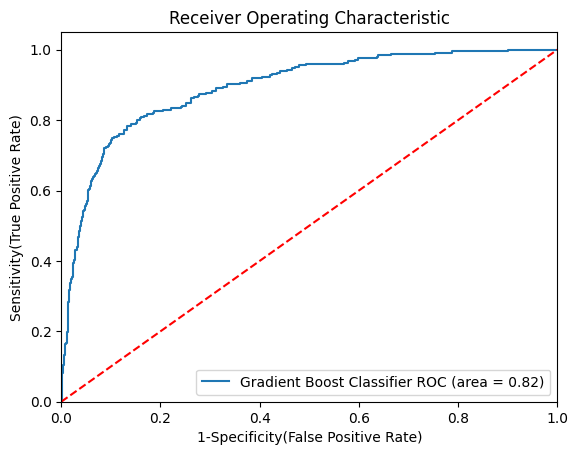

In [36]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

auc_models = [
{
    'label': 'Gradient Boost Classifier',
    'model': model_param['Gradient Boost Classifier']['best_estimator_'],
    'auc':  0.8234
},
    
]

for algo in auc_models:
    model = algo['model']
    model.fit(x_train, y_train)

# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 